Comandos GIT para facilitar interagir com o repositório

In [15]:
#!git clone https://github.com/gcerbaro/DSFinal_global_cancer_patients.git
#%cd DSFinal_global_cancer_patients
#!git pull


In [16]:
import pandas as pd
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("./dataset/global_cancer_patients_2015_2024.csv")
df.head(5)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


Visualizações para análise exploratória

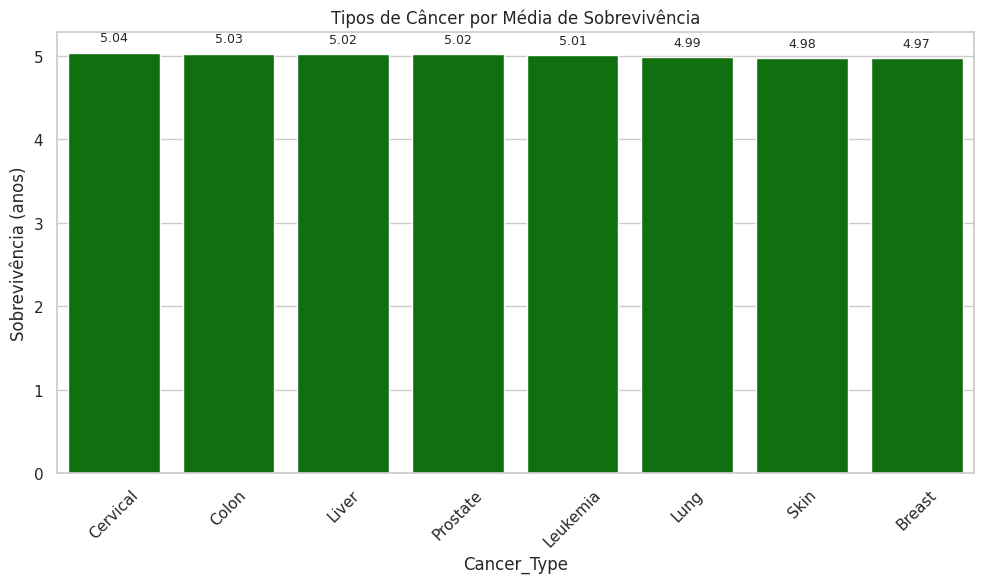

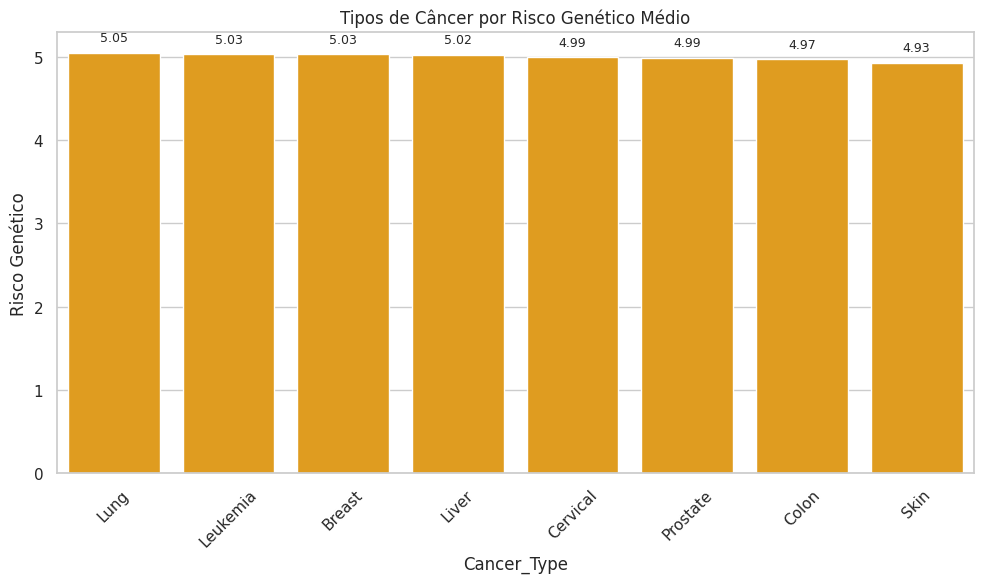

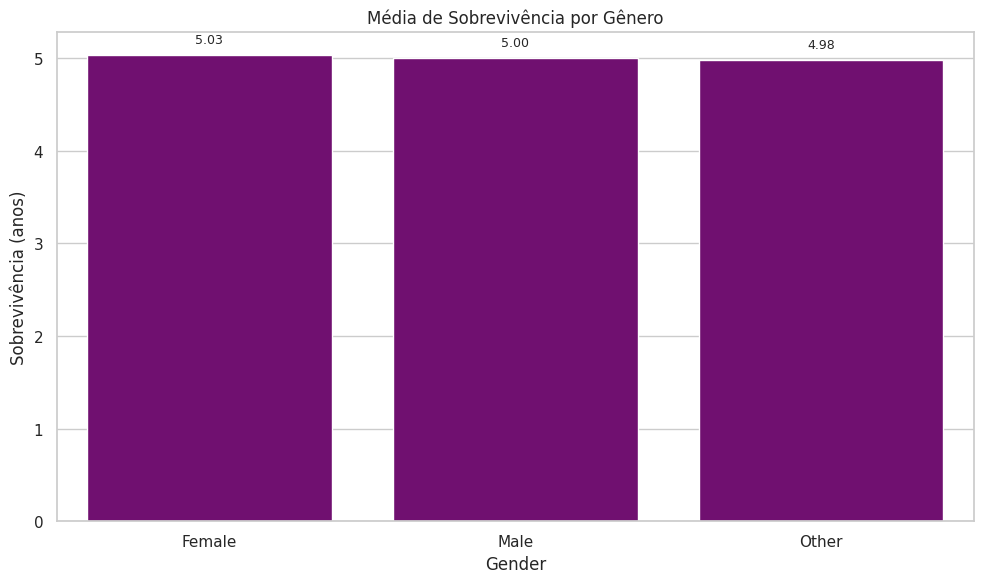

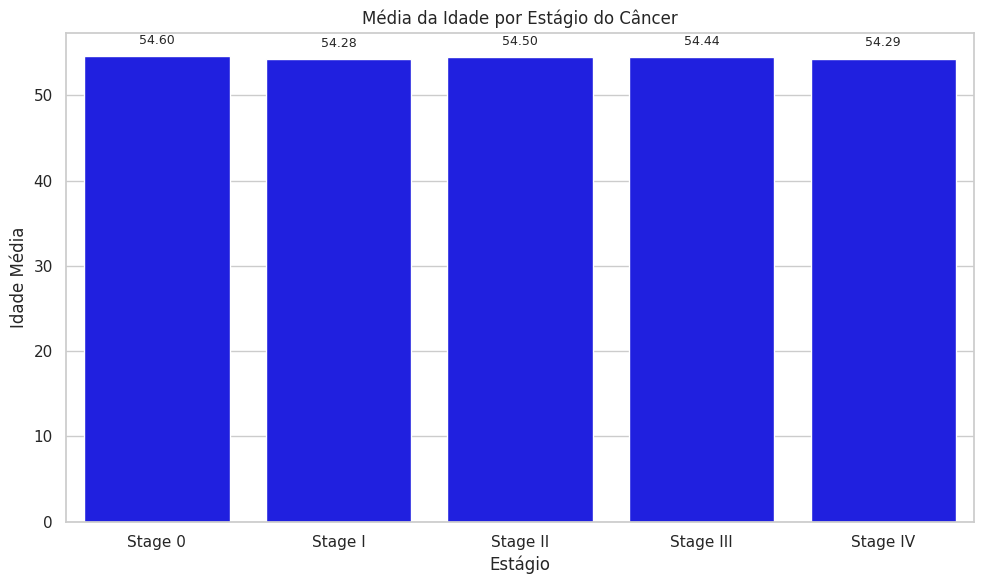

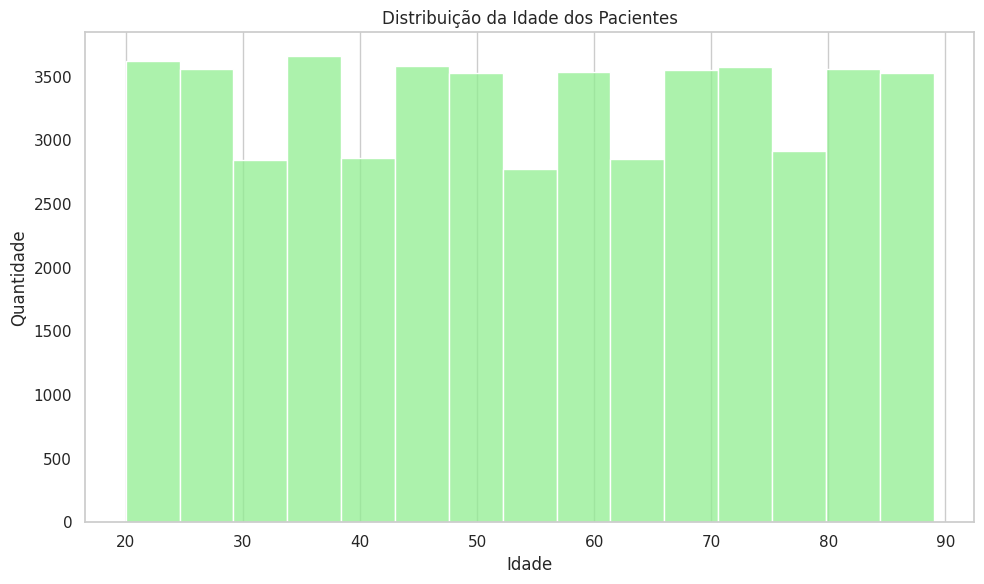

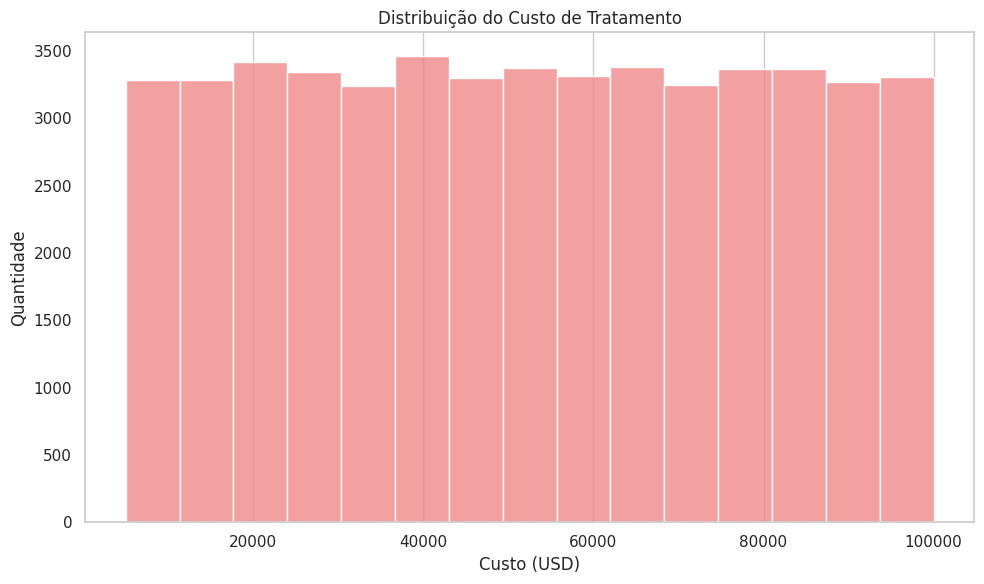

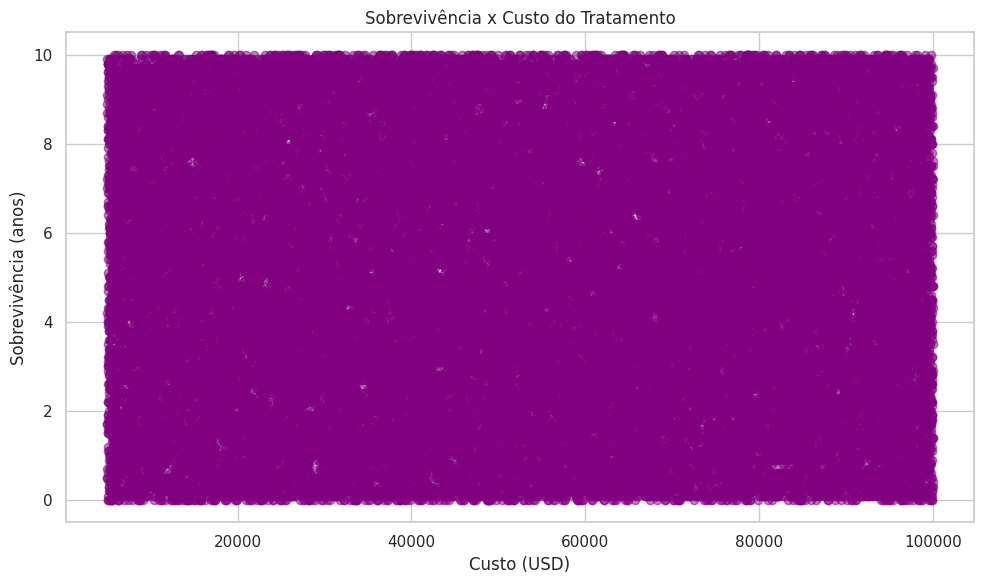

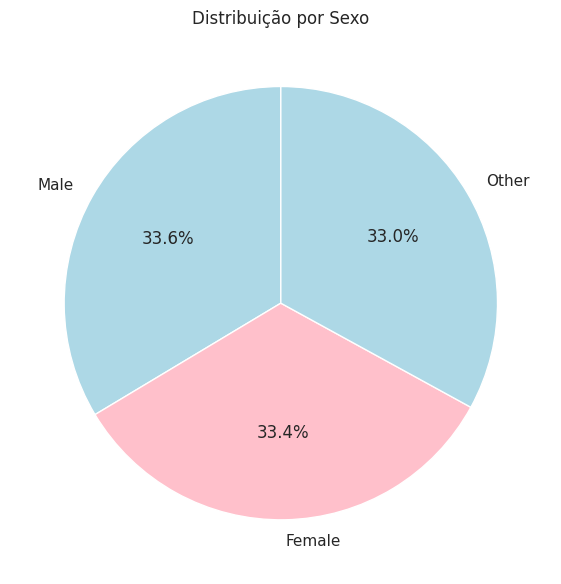

/tmp/ipython-input-17-2150443336.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_target.values, y=corr_target.index, palette=colors)


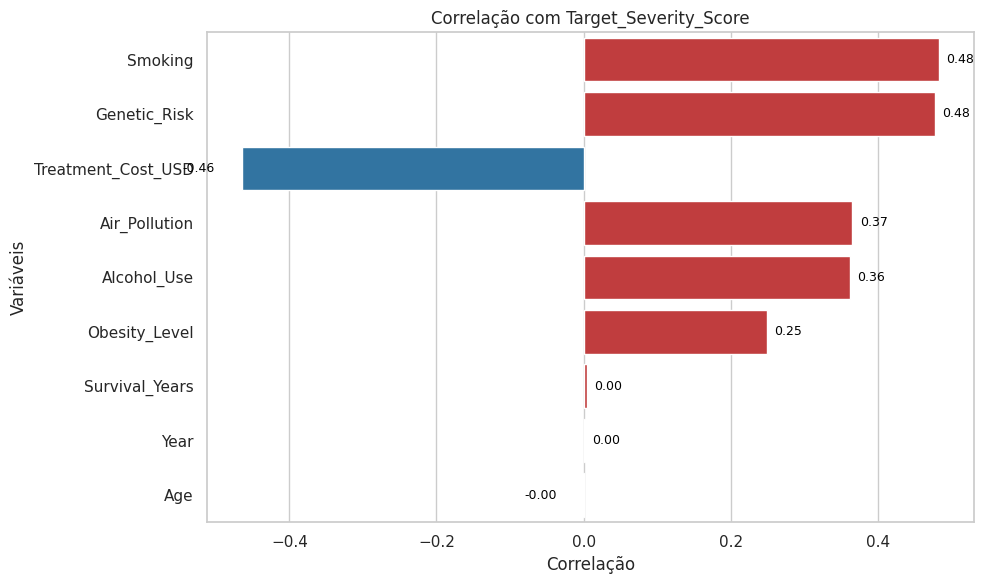

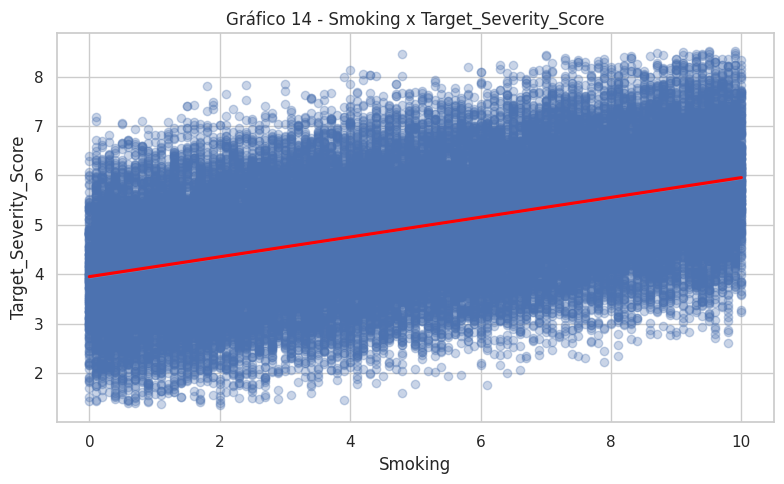

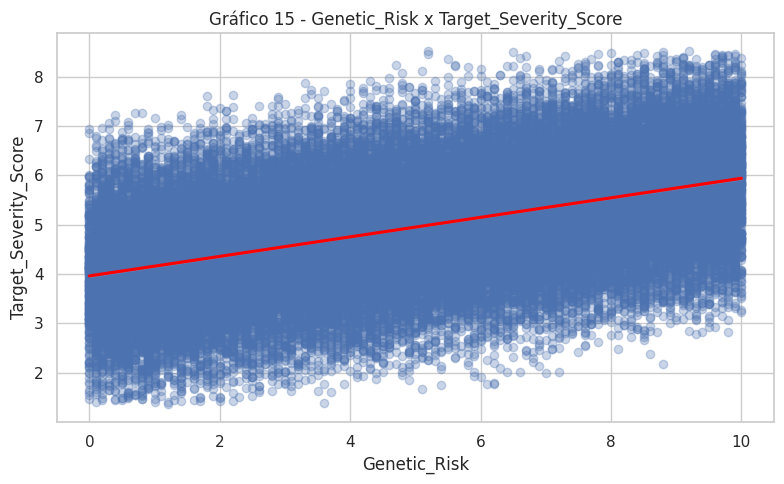

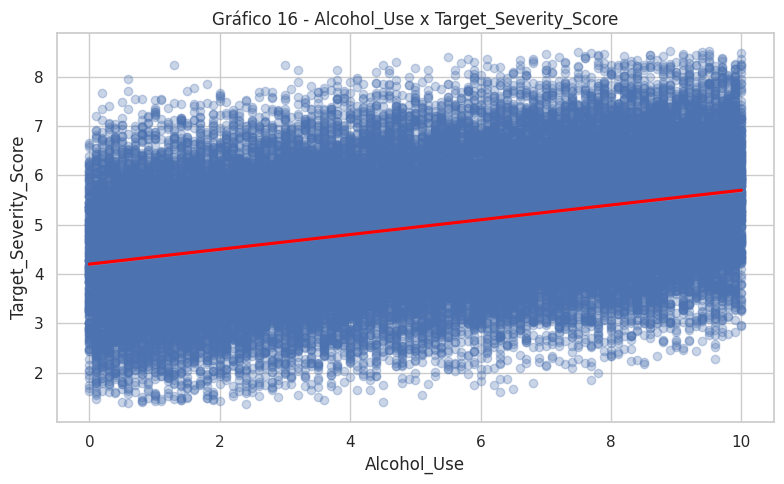

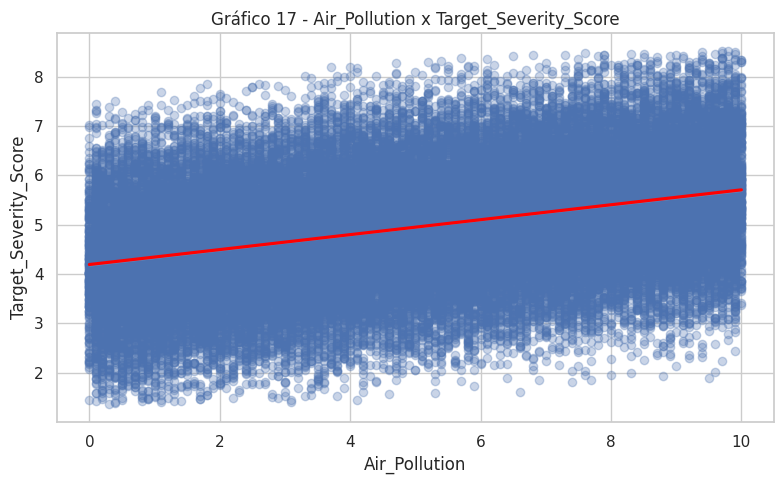

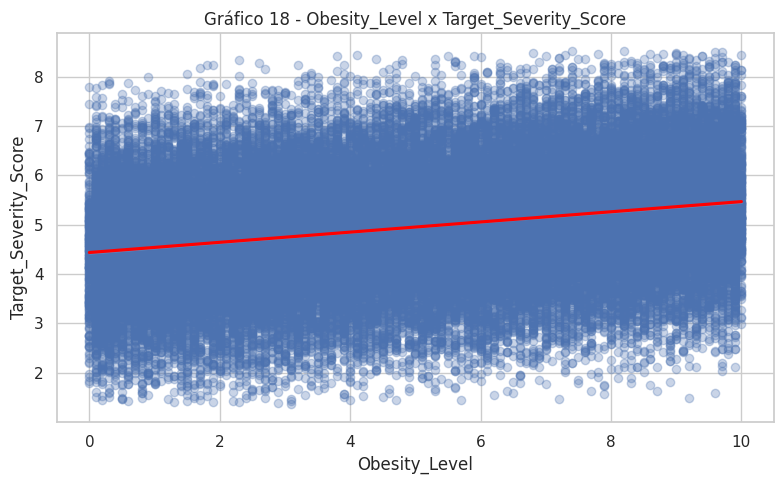

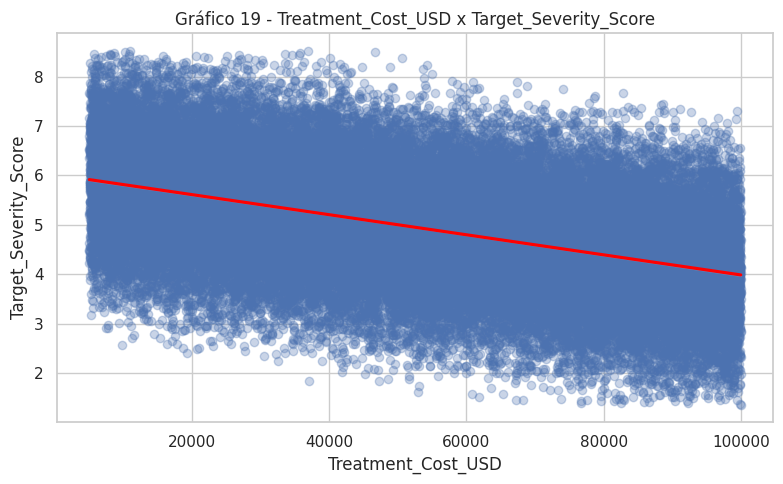

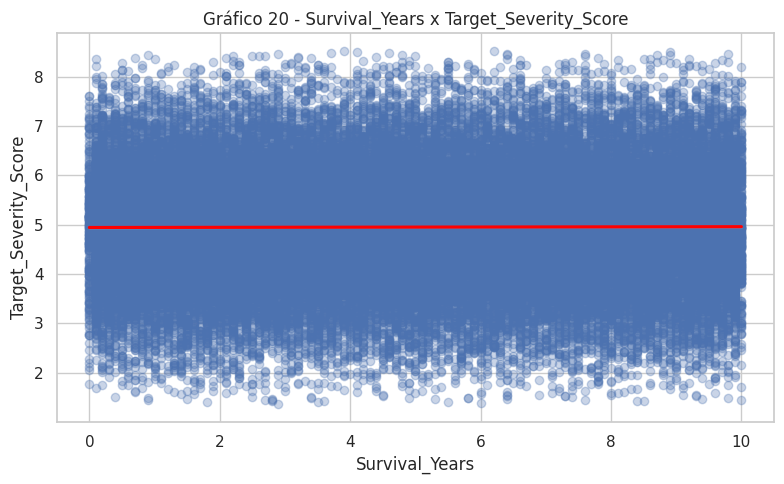

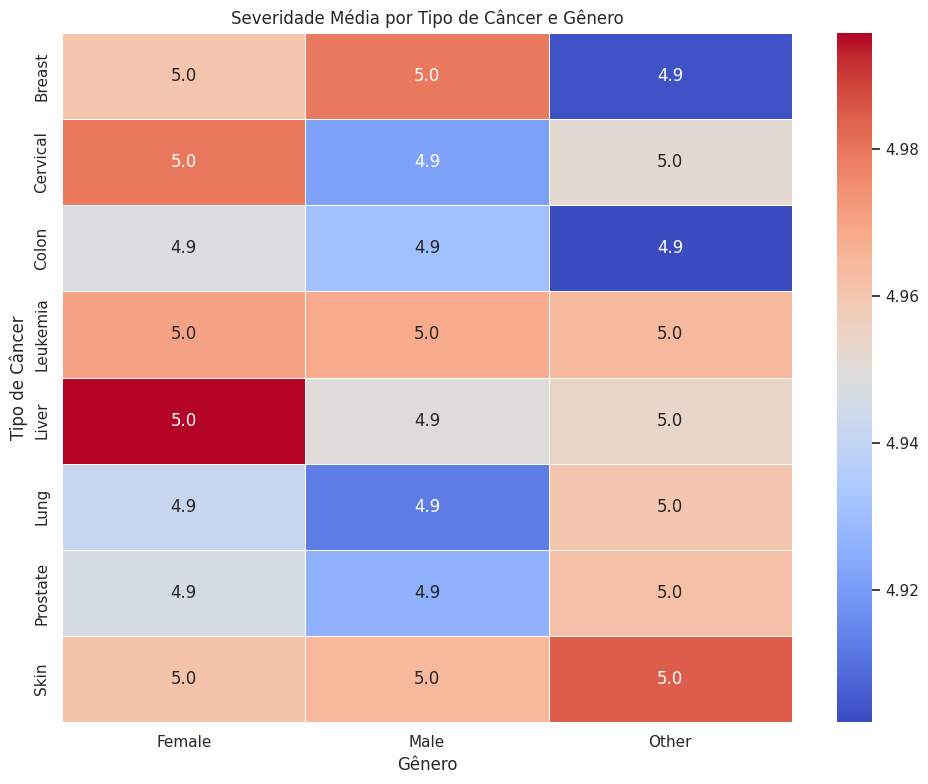

/tmp/ipython-input-17-2150443336.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancer_Stage', y='Survival_Years', data=df, palette='Pastel1')


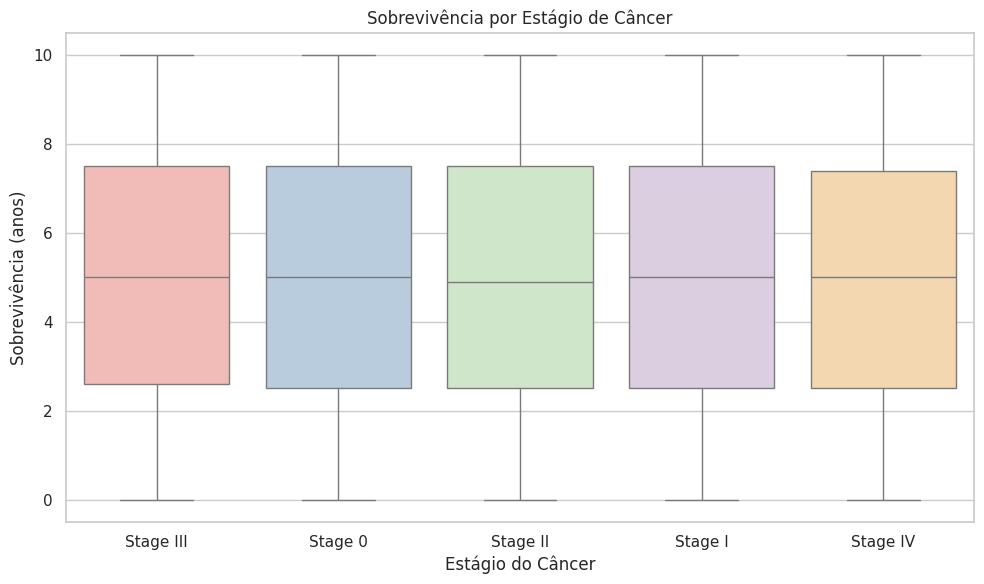

In [17]:
# Filtrar outliers com Z-score (colunas numéricas)
df_num = df.select_dtypes(include=['float64', 'int64'])
z_scores = stats.zscore(df_num)
df = df[(abs(z_scores) < 3).all(axis=1)]

df_encoded = df
df_decoded = df.copy

enconded_list = ['Gender', 'Country_Region', 'Cancer_Type']

for prefix in enconded_list:
    one_hot_cols = [col for col in df.columns if col.startswith(prefix + '_')]
    if not one_hot_cols:
        continue
    df[prefix] = df[one_hot_cols].idxmax(axis=1).str.replace(f'{prefix}_', '')
    df.drop(columns=one_hot_cols, inplace=True)

def print_and_plot_avg(df, df_encoded):

    def add_values_on_bars(ax, values):
        for i, v in enumerate(values):
            ax.text(i, v + v*0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

    # Tipos de Câncer por Média de Sobrevivência
    mean_survival = df.groupby('Cancer_Type')['Survival_Years'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=mean_survival.index, y=mean_survival.values, color='green')
    add_values_on_bars(ax, mean_survival.values)
    plt.title('Tipos de Câncer por Média de Sobrevivência')
    plt.xticks(rotation=45)
    plt.ylabel('Sobrevivência (anos)')
    plt.tight_layout()
    plt.show()

    # Tipos de Câncer por Risco Genético Médio
    mean_risk = df.groupby('Cancer_Type')['Genetic_Risk'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=mean_risk.index, y=mean_risk.values, color='orange')
    add_values_on_bars(ax, mean_risk.values)
    plt.title('Tipos de Câncer por Risco Genético Médio')
    plt.xticks(rotation=45)
    plt.ylabel('Risco Genético')
    plt.tight_layout()
    plt.show()

    # Média de Sobrevivência por Gênero
    mean_survival_gender = df.groupby('Gender')['Survival_Years'].mean()
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=mean_survival_gender.index, y=mean_survival_gender.values, color='purple')
    add_values_on_bars(ax, mean_survival_gender.values)
    plt.title('Média de Sobrevivência por Gênero')
    plt.ylabel('Sobrevivência (anos)')
    plt.tight_layout()
    plt.show()

    # Média da Idade por Estágio do Câncer
    mean_age_stage = df.groupby('Cancer_Stage')['Age'].mean()
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=mean_age_stage.index, y=mean_age_stage.values, color='blue')
    add_values_on_bars(ax, mean_age_stage.values)
    plt.title('Média da Idade por Estágio do Câncer')
    plt.xlabel('Estágio')
    plt.ylabel('Idade Média')
    plt.tight_layout()
    plt.show()

    # Distribuição da Idade dos Pacientes
    plt.figure(figsize=(10,6))
    sns.histplot(df['Age'], bins=15, color='lightgreen')
    plt.title('Distribuição da Idade dos Pacientes')
    plt.xlabel('Idade')
    plt.ylabel('Quantidade')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Distribuição do Custo de Tratamento
    plt.figure(figsize=(10,6))
    sns.histplot(df['Treatment_Cost_USD'], bins=15, color='lightcoral')
    plt.title('Distribuição do Custo de Tratamento')
    plt.xlabel('Custo (USD)')
    plt.ylabel('Quantidade')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Sobrevivência x Custo do Tratamento
    plt.figure(figsize=(10,6))
    plt.scatter(df['Treatment_Cost_USD'], df['Survival_Years'], alpha=0.5, color='purple')
    plt.title('Sobrevivência x Custo do Tratamento')
    plt.xlabel('Custo (USD)')
    plt.ylabel('Sobrevivência (anos)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Distribuição por Sexo (pizza)
    plt.figure(figsize=(6,6))
    sex_counts = df['Gender'].value_counts()
    sex_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
    plt.title('Distribuição por Sexo')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    # Mapa de Correlação com Target_Severity_Score
    import numpy as np

    df_num = df_encoded.select_dtypes(include='number')
    corr_matrix = df_num.corr()

    if 'Target_Severity_Score' in corr_matrix.columns:
        corr_target = (
            corr_matrix['Target_Severity_Score']
            .drop('Target_Severity_Score')
            .dropna()
            .sort_values(key=abs, ascending=False)
        )

        colors = ['#d62728' if val > 0 else '#1f77b4' for val in corr_target.values]

        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")

        ax = sns.barplot(x=corr_target.values, y=corr_target.index, palette=colors)

        for i, val in enumerate(corr_target.values):
            ax.text(val + 0.01 if val > 0 else val - 0.08, i, f"{val:.2f}", va='center', color='black', fontsize=9)

        plt.title("Correlação com Target_Severity_Score")
        plt.xlabel("Correlação")
        plt.ylabel("Variáveis")
        plt.tight_layout()
        plt.show()

    else:
        print("A coluna 'Target_Severity_Score' não foi encontrada na matriz de correlação.")

    # Média de Sobrevivência por categorias one-hot Gender
    gender_cols = [col for col in df_encoded.columns if col.startswith('Gender_')]
    for col in gender_cols:
        mean_surv = df_encoded.loc[df_encoded[col] == 1, 'Survival_Years'].mean()
        print(f'Média de Sobrevivência para {col}: {mean_surv:.2f} anos')

    # Scatter plots das variáveis mais correlacionadas ao Target_Severity_Score
    correl_vars = ['Smoking', 'Genetic_Risk', 'Alcohol_Use', 'Air_Pollution', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years']
    for i, var in enumerate(correl_vars, start=14):
        plt.figure(figsize=(8, 5))
        sns.regplot(x=df[var], y=df['Target_Severity_Score'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
        plt.title(f'Gráfico {i} - {var} x Target_Severity_Score')
        plt.xlabel(var)
        plt.ylabel('Target_Severity_Score')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Mapa de calor: severidade média por tipo de câncer e gênero
    pivot = df.pivot_table(index='Cancer_Type', columns='Gender', values='Target_Severity_Score', aggfunc='mean')
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
    plt.title('Severidade Média por Tipo de Câncer e Gênero')
    plt.ylabel('Tipo de Câncer')
    plt.xlabel('Gênero')
    plt.tight_layout()
    plt.show()

    #Boxplot da Sobrevivência por Estágio de Câncer (adicional)
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Cancer_Stage', y='Survival_Years', data=df, palette='Pastel1')
    plt.title('Sobrevivência por Estágio de Câncer')
    plt.xlabel('Estágio do Câncer')
    plt.ylabel('Sobrevivência (anos)')
    plt.tight_layout()
    plt.show()

# Executar tudo
print_and_plot_avg(df, df_encoded)

Limpeza e normalização dos dados

0 Outlier values removed from 'Age'
0 Outlier values removed from 'Genetic_Risk'
0 Outlier values removed from 'Air_Pollution'
0 Outlier values removed from 'Alcohol_Use'
0 Outlier values removed from 'Smoking'
0 Outlier values removed from 'Obesity_Level'
0 Outlier values removed from 'Treatment_Cost_USD'
0 Outlier values removed from 'Survival_Years'
112 Outlier values removed from 'Target_Severity_Score'


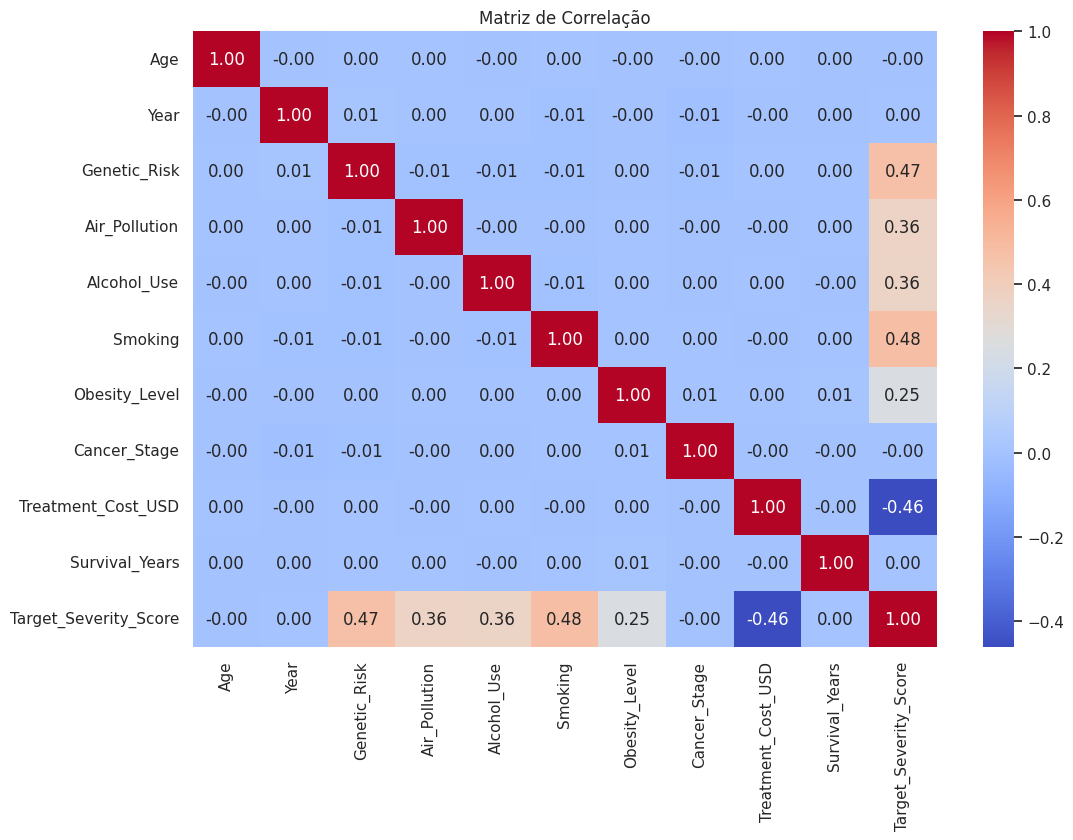

In [18]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


#Limpeza de valores nulos, duplicados e exclusao da coluna ID
df = df.dropna()
df = df.drop_duplicates()
df = df.drop(columns=['Patient_ID'])

# Remocao de valores irreais para propria descricao do dataset
# Pessoa não pode ter sobrevivido mais do que sua idade
df = df[df["Survival_Years"] <= df["Age"]]


#Conversao de valores textuais para numericos
# Uso de One-Hot Encoding para variaveis nominais e map para variavel ordinal em sequencia

#Estagio do cancer
cancer_stage_map = {
    'Stage 0': 0,
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3,
    'Stage IV': 4
}

df = pd.get_dummies(df, columns=[
    'Gender', 'Country_Region', 'Cancer_Type'], drop_first=True)
df['Cancer_Stage'] = df['Cancer_Stage'].map(cancer_stage_map)


# Visualizacao dos dados numeros na busca por outliers
df_numeric_cols = df.select_dtypes(include=['int64', 'float64'])
df_numeric_cols = df_numeric_cols.drop(columns=['Year', 'Cancer_Stage'])

# Remocao dos outliers baseado no IQR
def clear_outliers(c):
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df_limpo = df[(df[c] >= lower_limit) & (df[c] <= upper_limit)]

    print(f"{df.shape[0] - df_limpo.shape[0]} Outlier values removed from '{c}'")
    return df_limpo


for c in df_numeric_cols:
    df = clear_outliers(c)


# Normalizacao dos dados com MixMaxScaler
# Transforma dados numeros entre valores de 0 a 1
scaler = MinMaxScaler()

for c in df_numeric_cols:
    df[c] = scaler.fit_transform(df[[c]])

df


import seaborn as sns
import matplotlib.pyplot as plt

df_temp = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_temp.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Modelo de ML para predição: Random Forest Regression

In [19]:
X = df.drop(columns=['Target_Severity_Score'])
y = df['Target_Severity_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')


Mean Squared Error: 0.0007
R² Score: 0.9778


Resultados do modelo

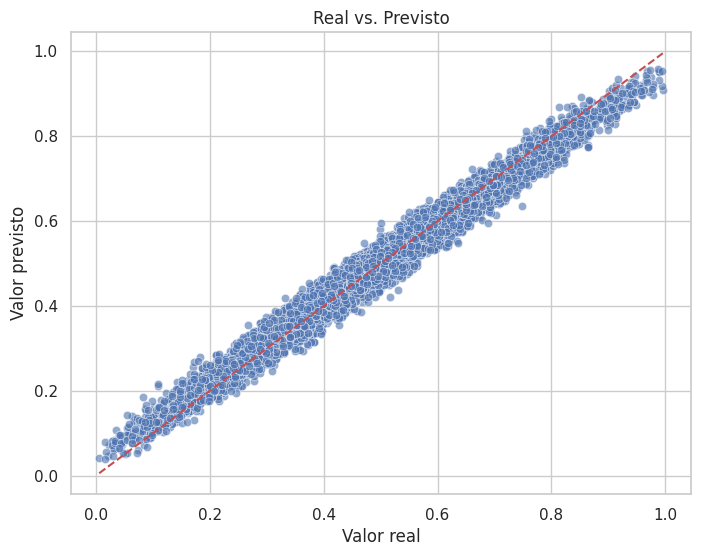

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valor real")
plt.ylabel("Valor previsto")
plt.title("Real vs. Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


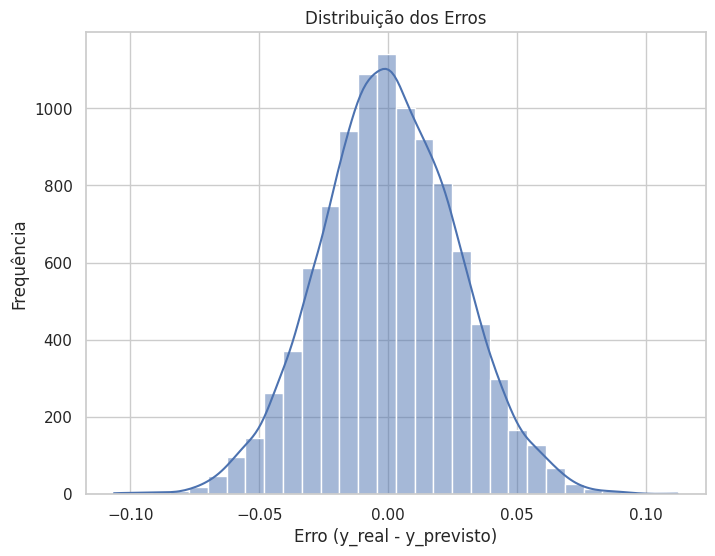

In [21]:
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribuição dos Erros")
plt.xlabel("Erro (y_real - y_previsto)")
plt.ylabel("Frequência")
plt.show()


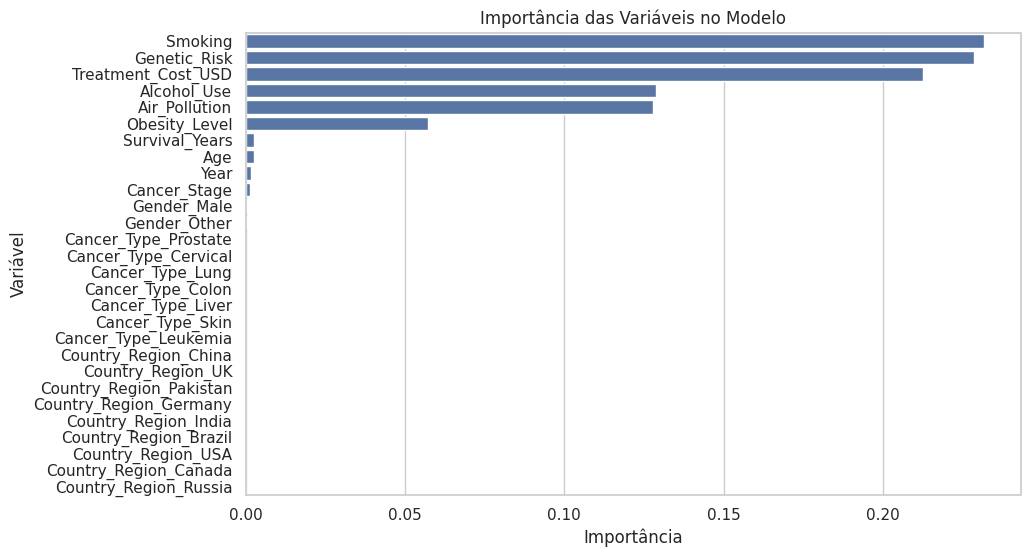

In [22]:
import pandas as pd

importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Importância das Variáveis no Modelo")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()
